In [148]:
# !pip install hmmlearn

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import YearLocator, MonthLocator

In [2]:
raw = pd.read_csv('./data/tr_eikon_eod_data.csv', 
                  index_col=0, parse_dates=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [3]:
selected = ['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']

In [4]:
data = pd.DataFrame(raw[selected].dropna())
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08
2010-01-05,30.625684,30.960,20.87,134.69,176.14
2010-01-06,30.138541,30.770,20.80,132.25,174.26
2010-01-07,30.082827,30.452,20.60,130.00,177.67
2010-01-08,30.282827,30.660,20.83,133.52,174.31
...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54
2018-06-26,184.430000,99.080,49.67,1691.09,221.58
2018-06-27,184.160000,97.540,48.76,1660.51,220.18


In [5]:
symbol = 'GS.N'

In [6]:
data = pd.DataFrame(raw[symbol].dropna())

In [7]:
# calculate the log returns
## later HMM cannot handle NaN values
## so here replace NaN with 0
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1)).dropna()
data['Returns'].fillna(0, inplace=True)

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_66530/1099176780.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Returns'].fillna(0, inplace=True)


In [196]:
data['Returns'] = data[symbol].shift(1)/ data[symbol][1:] - 1
data['Returns'].fillna(0, inplace=True)

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/311901533.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Returns'].fillna(0, inplace=True)


### Sequential train-test split

In [8]:
# Splitting the data into training and testing
split = int(len(data['Returns'])/2)
data_train = data.iloc[:split].copy()
data_test = data.iloc[split:].copy()

In [11]:
data_train

,GS.N,Returns
Date,,
2010-01-04,173.08,0.000000
2010-01-05,176.14,0.017525
2010-01-06,174.26,-0.010731
2010-01-07,177.67,0.019379
2010-01-08,174.31,-0.019093
...,...,...
2014-03-27,162.29,0.003457
2014-03-28,162.30,0.000062
2014-03-31,163.85,0.009505


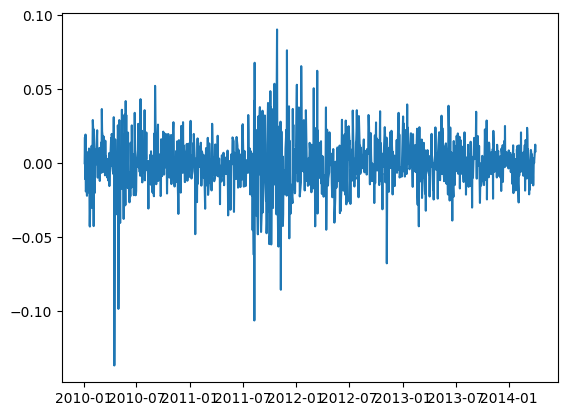

In [12]:
plt.plot(data_train['Returns'])

In [ ]:
rets = np.column_stack([data_train['Returns']])

In [19]:
rets = np.column_stack([data_train[symbol]])

Model Score: -4166.1136571366205
Number of hidden states: 1069

Percentage of hidden state 1 = 0.333022

Transition matrix
[[0.9985921  0.0014079 ]
 [0.00281067 0.99718933]]

Means and vars of each hidden state

0th hidden state
mean =  [156.02950494]
var =  [147.17284719]



1th hidden state
mean =  [108.34908426]
var =  [124.48020079]




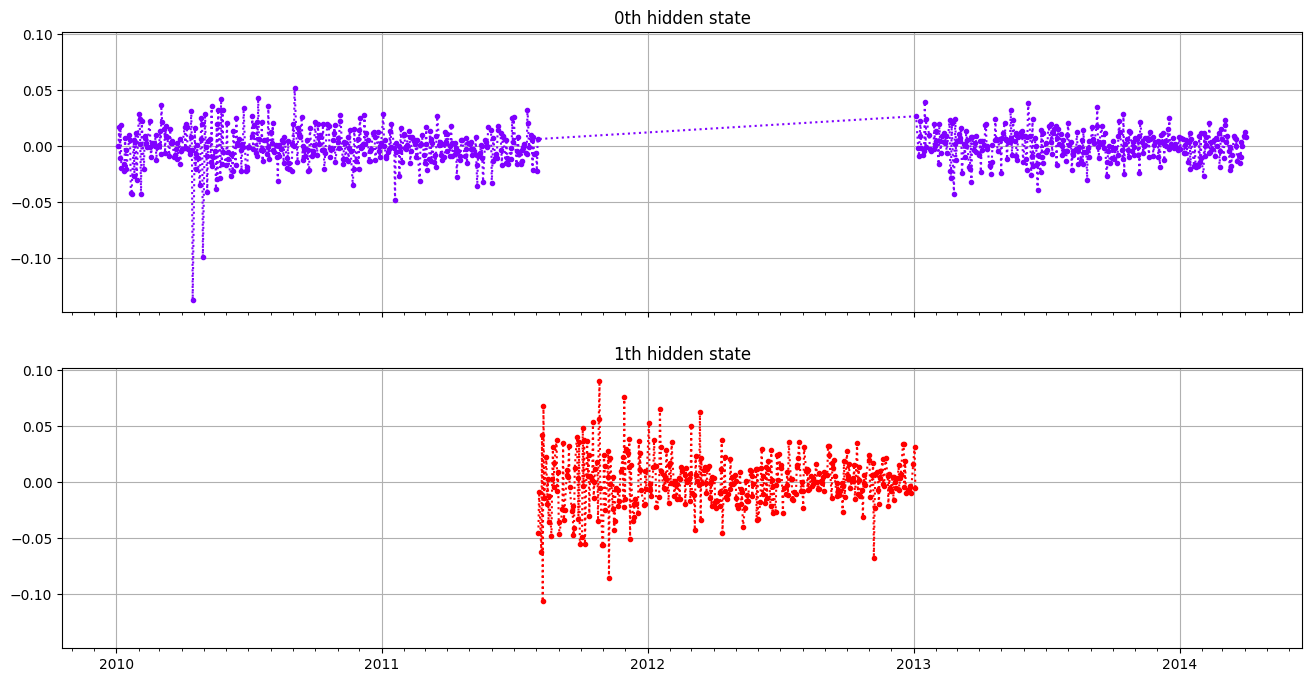

In [26]:
hmm_model = GaussianHMM(
    n_components=2,                     # number of states
    covariance_type="full",             # full covariance matrix vs diagonal
    n_iter=1000                         # number of iterations
).fit(rets)


print("Model Score:", hmm_model.score(rets))

# Plot the in sample hidden states closing values
# Predict the hidden states array
hidden_states = hmm_model.predict(rets)
print("Number of hidden states:",len(hidden_states))
print('\nPercentage of hidden state 1 = %f' % (sum(hidden_states)/len(hidden_states)))

print("\nTransition matrix")
print(hmm_model.transmat_)

print("\nMeans and vars of each hidden state")
for i in range(hmm_model.n_components):   
    # 0 is down, 1 is up
    print("\n{0}th hidden state".format(i))
    print("mean = ", hmm_model.means_[i])
    print("var = ", np.diag(hmm_model.covars_[i]))
    print("\n")
    

fig, axs = plt.subplots(hmm_model.n_components, figsize=(16,8),sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, hmm_model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Plot data in each state
    mask = hidden_states == i
    ax.plot_date(data_train['Returns'].index[mask], data_train['Returns'].loc[data_train['Returns'].index][mask], ".", linestyle='dotted', c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    ax.grid(True)

plt.show()

In [118]:
rets = np.column_stack([data_train['Returns']])

In [69]:
model = GaussianHMM(n_components=2, covariance_type="full", n_iter=100).fit(rets)

hidden_states = model.predict(rets)
print(hidden_states)

# Step 3: Generate Trading Signals
def generate_trading_signals(hidden_states):
    signals = np.zeros(len(hidden_states))
    for i in range(1, len(hidden_states)):
        if hidden_states[i] > hidden_states[i-1]:
            signals[i] = 1  # Buy signal
        elif hidden_states[i] < hidden_states[i-1]:
            signals[i] = -1  # Sell signal
    return signals

trading_signals = generate_trading_signals(hidden_states)
trading_signals.sum()

Model is not converging.  Current: 2851.336595614824 is not greater than 2851.369048528007. Delta is -0.032452913183078635


[1 1 1 ... 1 1 1]


0.0

In [70]:
data_train['Return_HMM2'] = trading_signals * data_train['Returns']
data_train[['Returns', 'Return_HMM2']].sum().apply(np.exp)

Returns        0.966432
Return_HMM2    1.068146
dtype: float64

In [75]:
def train_hmm(data, n_iter=1000):
    best_model = None
    best_score = float('-inf')
    
    for _ in range(n_iter):
        model = GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
        model.fit(data)
        score = model.score(data)
        if score > best_score:
            best_score = score
            best_model = model
    
    return best_model

def predict_hmm(model, data):
    _, states = model.decode(data)
    transposed_T = model.transmat_.T
    print(transposed_T)
    
    # Compute emission probabilities using Gaussian distributions
    pemis = np.array([model._compute_log_likelihood(data[t:t+1]) for t in range(data.shape[0])])
    
    # Convert log probabilities to probabilities
    pemis = np.exp(pemis)
    
    # Ensure states is of shape (n_samples, n_components)
    states = np.squeeze(states)
    print(states.shape)
    
    # Ensure pemis is of shape (n_samples, n_components)
    pemis = np.squeeze(pemis)
    print(pemis.shape)
    
    # Multiply by the transition matrix
    pemis = np.dot(model.transmat_, np.dot(states, pemis).T).T
    
    return pemis

def simple_trading_strategy(pemis):
    return np.argmax(pemis, axis=0)  # Buy if 'up' probability is higher, sell otherwise

# Example usage

# Training
model = train_hmm(rets)

# Prediction
pemis = predict_hmm(model, rets)

# Testing
predictions = simple_trading_strategy(pemis)


Model is not converging.  Current: 2851.320579264935 is not greater than 2851.368747003389. Delta is -0.04816773845413991
Model is not converging.  Current: 2851.328066578766 is not greater than 2851.37048206991. Delta is -0.04241549114385634
Model is not converging.  Current: 2851.3480255923223 is not greater than 2851.3651091023235. Delta is -0.017083510001157265
Model is not converging.  Current: 2851.315689538422 is not greater than 2851.350440110502. Delta is -0.03475057208015642
Model is not converging.  Current: 2851.3449110383935 is not greater than 2851.3738848798944. Delta is -0.028973841500828712
Model is not converging.  Current: 2851.3482307218214 is not greater than 2851.380146241324. Delta is -0.0319155195024905
Model is not converging.  Current: 2851.3322944412084 is not greater than 2851.375022069495. Delta is -0.042727628286684194
Model is not converging.  Current: 2851.306565461416 is not greater than 2851.3607537209996. Delta is -0.05418825958349771
Model is not con

[[0.96223629 0.00793648]
 [0.03776371 0.99206352]]
(1069,)
(1069, 2)


In [72]:
model

GaussianHMM(covariance_type='full', n_components=2, n_iter=100)

In [119]:
hidden_states = model.predict(rets)
print(hidden_states)

# Step 3: Generate Trading Signals
def generate_trading_signals(hidden_states):
    signals = np.zeros(len(hidden_states))
    for i in range(1, len(hidden_states)):
        if hidden_states[i] > hidden_states[i-1]:
            signals[i] = 1  # Buy signal
        elif hidden_states[i] < hidden_states[i-1]:
            signals[i] = -1  # Sell signal
        else:
            signals[i] = signals[i-1]
    return signals

trading_signals = generate_trading_signals(hidden_states)
trading_signals.sum()

[1 1 1 ... 1 1 1]


711.0

In [120]:
data_train['Return_HMM2'] = trading_signals * data_train['Returns']
data_train[['Returns', 'Return_HMM2']].sum().apply(np.exp)

Returns        0.966432
Return_HMM2    3.104468
dtype: float64

In [121]:
rets = np.column_stack([data_test['Returns']])

In [122]:
hidden_states = model.predict(rets)
print(hidden_states)

# Step 3: Generate Trading Signals
def generate_trading_signals(hidden_states):
    signals = np.zeros(len(hidden_states))
    for i in range(1, len(hidden_states)):
        if hidden_states[i] > hidden_states[i-1]:
            signals[i] = 1  # Buy signal
        elif hidden_states[i] < hidden_states[i-1]:
            signals[i] = -1  # Sell signal
        else:
            signals[i] = signals[i-1]
    return signals

trading_signals = generate_trading_signals(hidden_states)
trading_signals.sum()

[1 1 1 ... 1 1 1]


645.0

In [123]:
data_test['Returns_HMM2'] = trading_signals * data_test['Returns']
data_test[['Returns', 'Returns_HMM2']].sum().apply(np.exp)

Returns         1.318646
Returns_HMM2    2.288387
dtype: float64

In [115]:
data_test['direction'] = np.sign(data_test['Returns']).dropna().astype(int)

In [116]:
(trading_signals != data_test['direction']).sum()

695

In [117]:
len(data_test)

1069

Model is not converging.  Current: 3091.449512355747 is not greater than 3091.4500331362456. Delta is -0.0005207804983911046


Model Score: 3091.400911719895
Number of hidden states: 1069

Percentage of hidden state 1 = 0.105706

Transition matrix
[[0.93412923 0.0013921  0.06447867]
 [0.00148724 0.8690437  0.12946906]
 [0.79228216 0.13057535 0.07714249]]

Means and vars of each hidden state

0th hidden state
mean =  [0.00082263]
var =  [0.00013714]



1th hidden state
mean =  [-0.00220317]
var =  [0.00076705]



2th hidden state
mean =  [-0.00378179]
var =  [0.00066408]




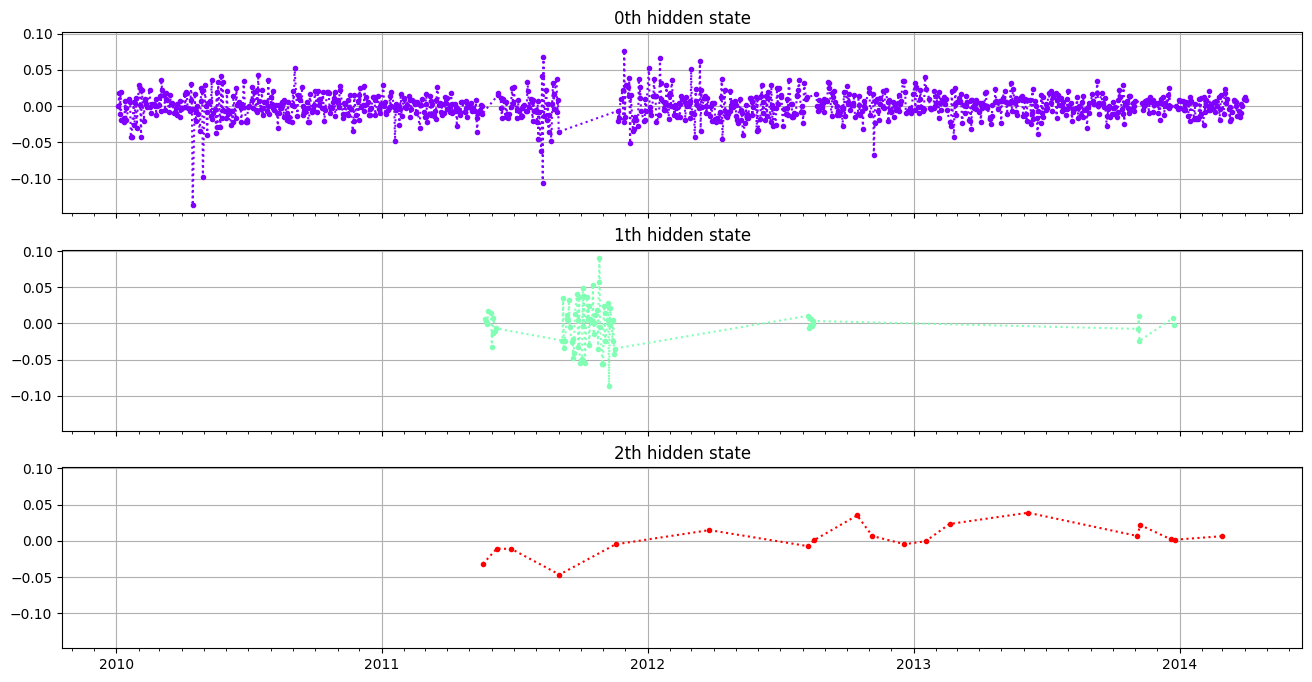

In [101]:
# Fit a Gaussian HMM to the returns data
hmm_model = GaussianHMM(
    n_components=3,                     # number of states
    covariance_type="full",             # full covariance matrix vs diagonal
    n_iter=1000                         # number of iterations
).fit(rets)

print("Model Score:", hmm_model.score(rets))

# Plot the in sample hidden states closing values
# Predict the hidden states array
hidden_states = hmm_model.predict(rets)
print("Number of hidden states:",len(hidden_states))
print('\nPercentage of hidden state 1 = %f' % (sum(hidden_states)/len(hidden_states)))

print("\nTransition matrix")
print(hmm_model.transmat_)

print("\nMeans and vars of each hidden state")
for i in range(hmm_model.n_components):   
    # 0 is down, 1 is up
    print("\n{0}th hidden state".format(i))
    print("mean = ", hmm_model.means_[i])
    print("var = ", np.diag(hmm_model.covars_[i]))
    print("\n")
    

fig, axs = plt.subplots(hmm_model.n_components, figsize=(16,8),sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, hmm_model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Plot data in each state
    mask = hidden_states == i
    ax.plot_date(data_train['Returns'].index[mask], data_train['Returns'].loc[data_train['Returns'].index][mask], ".", linestyle='dotted', c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    ax.grid(True)

plt.show()

In [257]:
returns = np.diff(data_train['Returns']) / data_train['Returns'][:-1]

In [255]:
returns

Date
2010-01-04         -inf
2010-01-07    -0.614785
2010-01-13    -6.818186
2010-01-21    -1.564365
2010-02-02    -0.924025
                ...    
2018-06-13    -1.150116
2018-06-14     1.973203
2018-06-18    -0.041821
2018-06-20    -1.082253
2018-06-26   -36.222545
Name: Returns, Length: 1068, dtype: float64

In [259]:
# Assuming returns, volatility, and volume are arrays containing the corresponding features for each time step
# Assuming hidden_states is the array of hidden states obtained from the HMM model

# Initialize dictionaries to store statistics for each state
state_statistics = {
    'state_0': {'returns': [], 'volatility': [], 'volume': []},
    'state_1': {'returns': [], 'volatility': [], 'volume': []},
    'state_2': {'returns': [], 'volatility': [], 'volume': []},
    # Add more states if necessary
}

# Iterate through the hidden_states and corresponding features
for state, ret, vol, volu in zip(hidden_states, returns):
    state_name = f'state_{state}'
    state_statistics[state_name]['returns'].append(ret)

# Compute average statistics for each state
average_statistics = {}
for state, stats in state_statistics.items():
    average_statistics[state] = {
        'average_returns': np.mean(stats['returns']),
    }

# Print or use the computed statistics
for state, stats in average_statistics.items():
    print(f"State: {state}")
    print(f"Average Returns: {stats['average_returns']}")
    print()

ValueError: not enough values to unpack (expected 4, got 2)

In [247]:
## on training data
hidden_states_replaced = np.where(hidden_states == 0, 1, hidden_states)
data_train['Prediction_HMM3'] = hidden_states_replaced
data_train['Return_HMM3'] = data_train['Prediction_HMM3'] * data_train['Returns']
data_train[['Returns', 'Return_HMM3']].sum().apply(np.exp)

Returns        0.667232
Return_HMM3    0.646153
dtype: float64

Observation: Model generated and returns changes drastically from each run, with some significantly better (might be overfitting) and some significantly worse than the benchmark strategy.

Sometimes the model doesn't even converge...

In [240]:
## change number of components to 2
hmm = GaussianHMM(n_components = 2, covariance_type='full',n_iter = 5000).fit(rets)
hidden_states = hmm.predict(rets)
hidden_states_replaced = np.where(hidden_states == 0, 1, -1)

Model is not converging.  Current: 2850.1138927162524 is not greater than 2850.218015447874. Delta is -0.10412273162182828


In [241]:
data_train['Return_HMM2'] = hidden_states_replaced * data_train['Returns']
data_train[['Returns', 'Return_HMM2']].sum().apply(np.exp)

Returns        0.667232
Return_HMM2    1.000024
dtype: float64

In [215]:
train_rets = np.column_stack([data_train['Returns']])
test_rets = np.column_stack([data_test['Returns']])

### Cross validation

In [217]:
import numpy as np
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Assuming rets is your data

# Define parameters to cross-validate
n_components_range = [2, 3, 4]  # Number of hidden states
covariance_type_range = ['spherical', 'diag', 'full']  # Type of covariance matrix

# Initialize variables to store best parameters and score
best_score = float('inf')  # Initialize with a high value
best_params = {'n_components': None, 'covariance_type': None}

# Perform cross-validation
for n_components in n_components_range:
    for covariance_type in covariance_type_range:
        print(f"Evaluating model with n_components={n_components} and covariance_type='{covariance_type}'")

        # Initialize TimeSeriesSplit for time-series cross-validation
        tscv = TimeSeriesSplit(n_splits=5)

        # Initialize variable to store mean squared errors
        # Perform cross-validation

        # Train Gaussian HMM
        hmm = GaussianHMM(n_components=n_components, covariance_type=covariance_type, n_iter=5000).fit(train_rets)

        # Predict hidden states
        hidden_states = hmm.predict(test_rets)

        # Reshape test_data to 2D array
        test_rets = test_rets.reshape(-1, 1)

        # Calculate mean squared error
        mse = mean_squared_error(test_rets, hidden_states)

        # Calculate average MSE across all folds

        # Print MSE
        print(f"MSE: {mse}")

        # Update best parameters if this model has a lower MSE
        if mse < best_score:
            best_score = mse
            best_params['n_components'] = n_components
            best_params['covariance_type'] = covariance_type

print("Best parameters:")
print(best_params)
print("Best MSE:", best_score)


Model is not converging.  Current: 2850.034843230162 is not greater than 2850.0750767261047. Delta is -0.040233495942629816
Model is not converging.  Current: 2850.05818030955 is not greater than 2850.0969435075826. Delta is -0.03876319803248407


Evaluating model with n_components=2 and covariance_type='spherical'
MSE: 0.9656948887586363
Evaluating model with n_components=2 and covariance_type='diag'
MSE: 0.03502238280498801
Evaluating model with n_components=2 and covariance_type='full'


Model is not converging.  Current: 2850.035134049448 is not greater than 2850.072328257551. Delta is -0.03719420810284646
Model is not converging.  Current: 2855.6306233506175 is not greater than 2855.77909294126. Delta is -0.14846959064243492


MSE: 0.9656948887586363
Evaluating model with n_components=3 and covariance_type='spherical'
MSE: 0.17143315335596793
Evaluating model with n_components=3 and covariance_type='diag'


Model is not converging.  Current: 2852.594848956089 is not greater than 2852.5949423464813. Delta is -9.339039206679445e-05


MSE: 0.11137127420930912
Evaluating model with n_components=3 and covariance_type='full'
MSE: 1.030812278281745
Evaluating model with n_components=4 and covariance_type='spherical'
MSE: 0.08771364929711165
Evaluating model with n_components=4 and covariance_type='diag'


Model is not converging.  Current: 2856.0828312774865 is not greater than 2856.1381575044443. Delta is -0.055326226957731706
Model is not converging.  Current: 2853.687903114737 is not greater than 2853.720079930748. Delta is -0.032176816011087794


MSE: 3.9406548134534627
Evaluating model with n_components=4 and covariance_type='full'
MSE: 4.067938233867383
Best parameters:
{'n_components': 2, 'covariance_type': 'diag'}
Best MSE: 0.03502238280498801


Still getting very different answers for different runs...

## A different attempt
https://www.kaggle.com/code/ehsanamim/stock-market-prediction-using-hmm

In [267]:
rets = data_train[symbol].pct_change()
rets.fillna(0, inplace = True)
rets

Date
2010-01-04    0.000000
2010-01-07    0.026520
2010-01-13   -0.048404
2010-01-21   -0.048501
2010-02-02   -0.024430
                ...   
2018-06-14   -0.000770
2018-06-18   -0.009673
2018-06-20   -0.015428
2018-06-26   -0.027390
2018-06-27   -0.006318
Name: GS.N, Length: 1069, dtype: float64

In [268]:
rets = np.column_stack([rets])
rets

array([[ 0.        ],
       [ 0.02651953],
       [-0.04840435],
       ...,
       [-0.0154285 ],
       [-0.02739004],
       [-0.00631826]])

In [269]:
rets.shape

(1069, 1)

In [273]:
model = GaussianHMM(n_components = 10)

In [276]:
model.fit(rets)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


GaussianHMM(n_components=10)

In [280]:
num_latent_days = 50

In [282]:
from tqdm import tqdm
import itertools

In [284]:
predicted = []
outcomes = np.array(list(itertools.product(rets)))
for i in tqdm(range(len(rets))):
    previous_data_start_index = max(0, i - num_latent_days)
    previous_data_end_index = max(0, i)

    previous_data = np.column_stack([rets[previous_data_start_index:previous_data_end_index]])

outcomes

  0%|          | 0/1069 [00:00<?, ?it/s]

100%|██████████| 1069/1069 [00:00<00:00, 70002.20it/s]


array([[[ 0.        ]],

       [[ 0.02651953]],

       [[-0.04840435]],

       ...,

       [[-0.0154285 ]],

       [[-0.02739004]],

       [[-0.00631826]]])

In [305]:
x_axis = data_train.index

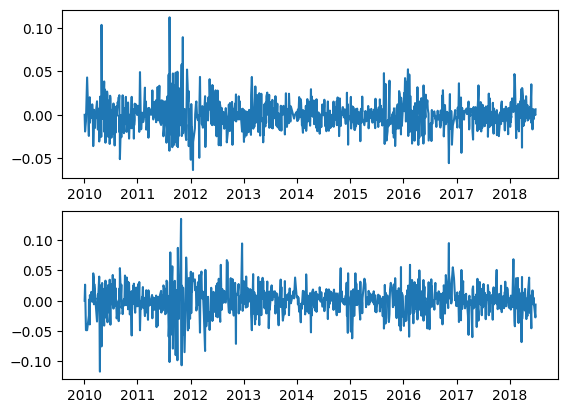

In [309]:
plt.subplot(2, 1, 1)
plt.plot(x_axis, data_train['Returns'])
plt.subplot(2, 1, 2)
plt.plot(list(x_axis), outcomes.reshape(len(outcomes)))

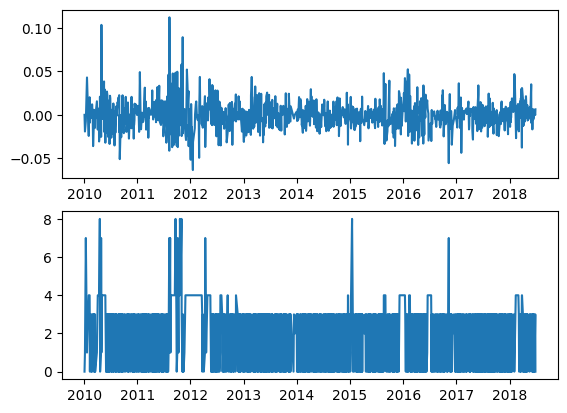

In [311]:
result = model.predict(rets)
plt.subplot(2, 1, 1)
plt.plot(x_axis, data_train['Returns'])
plt.subplot(2, 1, 2)
plt.plot(list(x_axis), result.reshape(len(result)))

In [286]:
strat = np.sign(outcomes)

In [277]:
score = model.score(rets)
score

2605.8269730741004

## Another attempt
https://www.kaggle.com/code/wangqiyuan/trading-bitcoin-with-hidden-markov-model

In [315]:
raw

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58


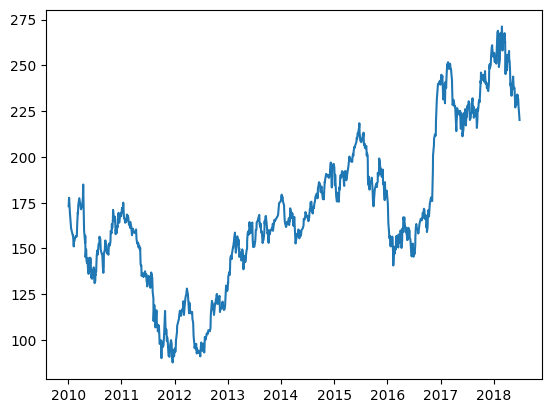

In [320]:
plt.plot(data_train[symbol])

In [335]:
ndays = data_train[symbol].size

ndays

1069

In [336]:
# Baseline strategy
## previous day trend follower with frictionless environment
Portfolio0=np.zeros((ndays,2))
Portfolio0[0,0]=1
Portfolio0[1,0]=1
a='c'
ntrades=0
for t in range(2,ndays):
    if data_train[symbol][t-1]>data_train[symbol][t-2]:
        Portfolio0[t-1,1]=Portfolio0[t-1,1]+Portfolio0[t-1,0]/data_train[symbol][t-1]
        Portfolio0[t-1,0]=0
        if a=='c':
            ntrades=ntrades+1
            a='b'
    else:
        Portfolio0[t-1,0]=Portfolio0[t-1,0]+Portfolio0[t-1,1]*data_train[symbol][t-1]
        Portfolio0[t-1,1]=0 
        if a=='b':
            ntrades=ntrades+1
            a='c'
    Portfolio0[t]=Portfolio0[t-1]

V0=Portfolio0[:,0]+Portfolio0[:,1]*data_train[symbol]

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/3561723032.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data_train[symbol][t-1]>data_train[symbol][t-2]:
/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/3561723032.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Portfolio0[t-1,1]=Portfolio0[t-1,1]+Portfolio0[t-1,0]/data_train[symbol][t-1]
/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/3561723032.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/37286842.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.semilogy(data_train[symbol]/data_train[symbol][0],label='changes based on previous day')


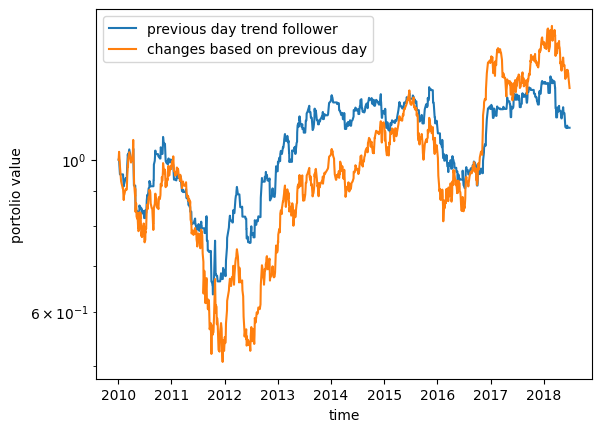

number of trades = 528


In [338]:
plt.semilogy(V0,label='previous day trend follower')
plt.semilogy(data_train[symbol]/data_train[symbol][0],label='changes based on previous day')
plt.legend()
plt.xlabel('time')
plt.ylabel('portolio value')
plt.show()
print('number of trades = '+str(ntrades))

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/2403137684.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.semilogy(friction,V0[-1]*np.power(1-friction,ntrades),label='previous day trend follower')
/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/2403137684.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.semilogy([0,0.02],[data_train[symbol][-1]/data_train[symbol][0],data_train[symbol][-1]/data_train[symbol][0]],label='investment')


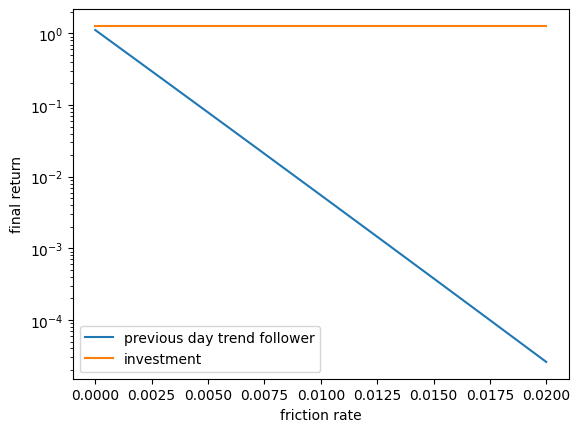

In [340]:
# Previous day trend follower with market friction
friction=np.linspace(0,0.02,100)
plt.semilogy(friction,V0[-1]*np.power(1-friction,ntrades),label='previous day trend follower')
plt.semilogy([0,0.02],[data_train[symbol][-1]/data_train[symbol][0],data_train[symbol][-1]/data_train[symbol][0]],label='investment')
plt.legend()
plt.xlabel('friction rate')
plt.ylabel('final return')
plt.show()

In [342]:
UB=np.zeros(100)
TR=np.zeros(100)
for i in range(100):
    f=friction[i]
    c=1
    b=0
    tc=0
    tb=0
    for t in range(1,ndays):
        if (1-f)*b*data_train[symbol][t]>c:
            c=(1-f)*b*data_train[symbol][t]
            tc=tb+1
        if (1-f)*c/data_train[symbol][t]>b:
            b=(1-f)*c/data_train[symbol][t]
            tb=tc+1
    UB[i]=c
    TR[i]=tc

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/3269497944.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (1-f)*b*data_train[symbol][t]>c:
/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/3269497944.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (1-f)*c/data_train[symbol][t]>b:
/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/3269497944.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position,

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/498276236.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.semilogy(friction,V0[-1]*np.power(1-friction,ntrades),label='previous day trend follower')
/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/498276236.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.semilogy([0,0.02],[data_train[symbol][-1]/data_train[symbol][0],data_train[symbol][-1]/data_train[symbol][0]],label='investment')


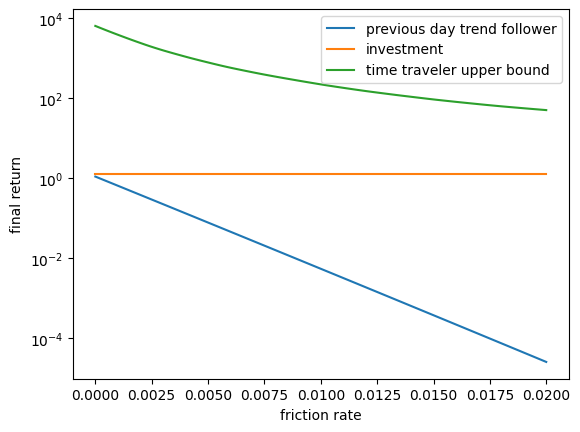

In [343]:
friction=np.linspace(0,0.02,100)
plt.semilogy(friction,V0[-1]*np.power(1-friction,ntrades),label='previous day trend follower')
plt.semilogy([0,0.02],[data_train[symbol][-1]/data_train[symbol][0],data_train[symbol][-1]/data_train[symbol][0]],label='investment')
plt.semilogy(friction,UB,label='time traveler upper bound')
plt.legend()
plt.xlabel('friction rate')
plt.ylabel('final return')
plt.show()

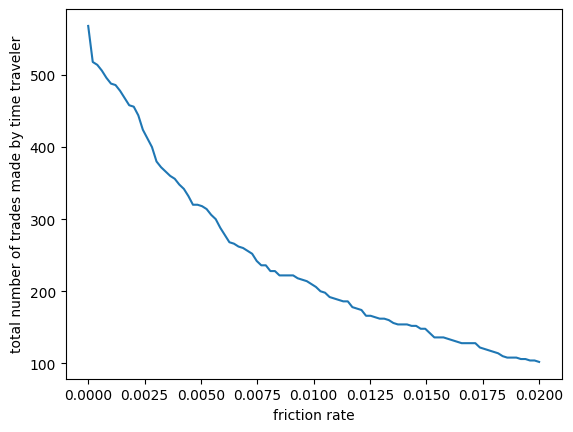

In [344]:
plt.plot(friction,TR)
plt.xlabel('friction rate')
plt.ylabel('total number of trades made by time traveler')
plt.show()

In [321]:
# HMM
## HMM fitting algorithm
from scipy.optimize import minimize

class MHH:

    def fit_HMM(self,Prices,nstarts=10):

        R=np.log(Prices[1:]/Prices[:-1])
        n=R.shape[0]
    
        bnds = ((None,None),(None,None),(None,None),(None,None),(None,0),(None, 0),(None, 0), (0, 1),(0, 1), (0, 1),(None,None))

        def HMM_NLL(x):
            sig=np.exp(x[0])
            MU=x[1:4]
            r0,r1,r2=np.exp(x[4:7])
            p0,p1,p2=x[7:10]
            beta=x[10]
            TP=np.array([[1-r0,r0*p0,r0*(1-p0)],[r1*p1,1-r1,r1*(1-p1)],[r2*p2,r2*(1-p2),1-r2]]).T
            P=np.zeros((n+1,3))
            P[0,:]=np.ones(3)/3
            S=np.zeros(n+1)
            rold=0
            for t in range(n):
                P[t+1]=np.matmul(TP,P[t])
                for j in range(3):
                    P[t+1,j]=P[t+1,j]*np.exp(-0.5*((R[t]-rold*beta-MU[j])/sig)**2)/sig
                rold=R[t]
                S[t+1]=max(P[t+1])
                P[t+1]=P[t+1]/S[t+1]
            nll=-np.sum(np.log(S[1:]))
            return nll

        best=np.inf
        for i in range(nstarts):
            mu0=np.random.rand()*0.001
            mu1=np.random.rand()*0.001
            mu2=-np.random.rand()*0.001
            r0=np.random.rand()
            r1=np.random.rand()
            r2=np.random.rand()
            p0=np.random.rand()
            p1=np.random.rand()
            p2=np.random.rand()
            sig=np.random.rand()*0.1
            beta=np.random.rand()*0.1
            x0=np.array([np.log(sig),mu0,mu1,mu2,np.log(r0),np.log(r1),np.log(r2),p0,p1,p2,beta])

            OPT = minimize(HMM_NLL, x0,bounds=bnds)

            if i==0:
                x=OPT.x    
                OPTbest=OPT

            if OPT.fun<best:
                best=OPT.fun
                x=OPT.x
                OPTbest=OPT

        self.sig=np.exp(x[0])
        self.MU=x[1:4]
        r0,r1,r2=np.exp(x[4:7])
        p0,p1,p2=x[7:10]
        self.TP=np.array([[1-r0,r0*p0,r0*(1-p0)],[r1*p1,1-r1,r1*(1-p1)],[r2*p2,r2*(1-p2),1-r2]]).T
        self.beta=x[10]
        self.x=x
        self.OPT=OPT
        
        # reorder so MU is increasing 
        ix=np.argsort(-self.MU)
        self.MU=self.MU[ix]
        self.TP=self.TP[np.ix_(ix,ix)]
        
    def get_hidden_state_probabilities(self,Prices):
            R=np.log(Prices[1:]/Prices[:-1])
            n=R.shape[0]
            P=np.zeros((n+1,3))
            P[0,:]=np.ones(3)/3
            rold=0
            for t in range(n):
                P[t+1]=np.matmul(self.TP,P[t])
                for j in range(3):
                    P[t+1,j]=P[t+1,j]*np.exp(-0.5*((R[t]-self.beta*rold-self.MU[j])/self.sig)**2)/self.sig
                rold=R[t]
                P[t+1]=P[t+1]/np.sum(P[t+1])
            return P
        
    def get_expected_abnormal_rates(self,Prices):
        P=self.get_hidden_state_probabilities(Prices)
        
        R=np.zeros(Prices.shape[0])
        R[1:]=np.log(Prices[1:]/Prices[:-1])
        
        lam,V=np.linalg.eig(self.TP)
        ix=np.argsort(lam)
        lam=lam[ix]
        V=V[:,ix]
        V[:,2]=V[:,2]/np.sum(V[:,2])
        VMU=np.matmul(V.T,self.MU)
        D=(1/(1-hmm.beta))*(lam[:2]/(1-lam[:2]))*VMU[:2]

        EAR=np.matmul(D,np.linalg.solve(V,P.T)[:2,:])+(1/(1-self.beta))*R
        
        return EAR

In [324]:
Prices = data_train[symbol].values

hmm = MHH()
hmm.fit_HMM(Prices)

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/974350596.py:29: RuntimeWarning: invalid value encountered in divide
  P[t+1]=P[t+1]/S[t+1]
/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/974350596.py:30: RuntimeWarning: divide by zero encountered in log
  nll=-np.sum(np.log(S[1:]))


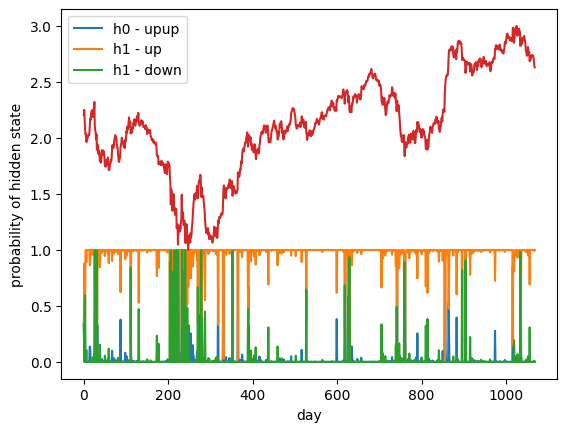

In [327]:
LP = np.log(Prices)
pmin = np.min(LP)
pmax = np.max(LP)
LP = (LP-pmin)/(pmax-pmin)

P = hmm.get_hidden_state_probabilities(Prices)
plt.plot(range(len(P)),P[:,0],label='h0 - upup')
plt.plot(range(len(P)),P[:,1],label='h1 - up')
plt.plot(range(len(P)),P[:,2],label='h1 - down')
plt.plot(range(len(P)),LP*2+1)
plt.legend()
plt.xlabel('day')
plt.ylabel('probability of hidden state')
plt.show()

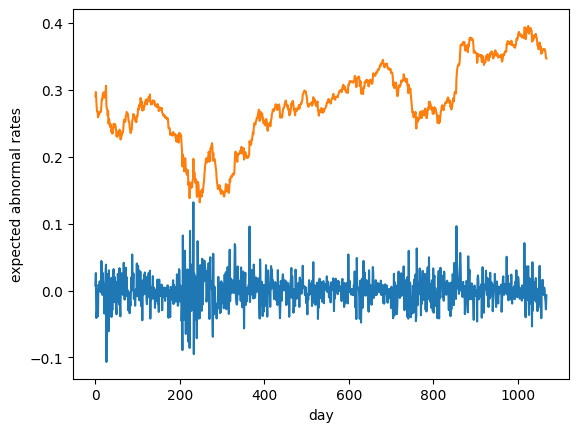

beta = -0.004543179458212947


MU =
[ 0.05590142  0.00085228 -0.06591254]


P =
[[0.1531225  0.01126769 0.31145268]
 [0.77696538 0.96169244 0.64280482]
 [0.06991212 0.02703987 0.0457425 ]]


In [328]:
EAR=hmm.get_expected_abnormal_rates(Prices)
plt.plot(range(len(EAR)),EAR)
plt.plot(range(len(EAR)),(LP*2+1)*np.max(EAR))
plt.xlabel('day')
plt.ylabel('expected abnormal rates')
plt.show()

print('beta = '+str(hmm.beta))
print('\n')
print('MU =')
print(hmm.MU)
print('\n')
print('P =')
print(hmm.TP)

In [329]:
# back train buy/sell policies
res=200
X=np.linspace(-0.1,0.1,res)
def back_train_pol(mdl,Prices):
    P=mdl.get_hidden_state_probabilities(Prices)
    EAR=mdl.get_expected_abnormal_rates(Prices)
    n=P.shape[0]
    best=-np.inf
    R=np.zeros((res,res))
    T=np.zeros((res,res))
    for j in range(res):
        for i in range(j,res):
            buy=X[i] # buy when EAR>buy
            sell=X[j] # sell when EAR<sell
            a='c'
            pc=1
            pb=0
            ntrades=0
            for t in range(n):
                if a=='c' and EAR[t]>buy:
                    pb=pc/Prices[t]
                    pc=0
                    a='b'
                    ntrades=ntrades+1
                if a=='b' and EAR[t]<sell:
                    pc=pb*Prices[t]
                    pb=0
                    a='c'
                    ntrades=ntrades+1
            score=pc+pb*Prices[t]
            R[i,j]=score
            T[i,j]=ntrades
    return R,T

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_69100/1892131843.py:7: RuntimeWarning: divide by zero encountered in log
  FR=np.log(R)+T*np.log(1-f)


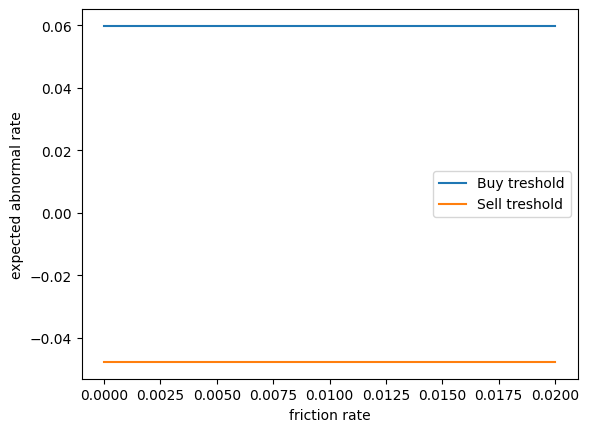

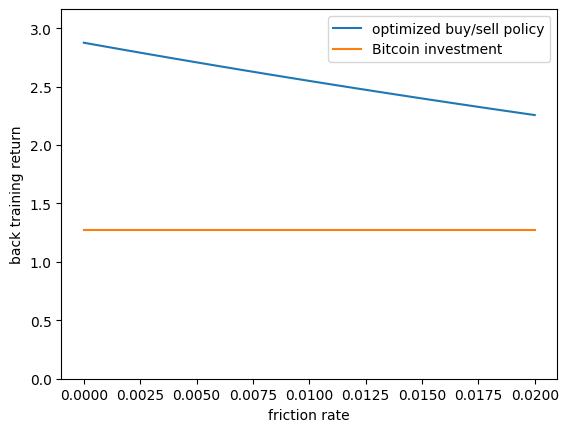

In [345]:
R,T=back_train_pol(hmm,Prices)
Back_train_Return=np.zeros(100)
Buy_Price=np.zeros(100)
Sell_Price=np.zeros(100)
for i in range(100):
    f=friction[i]
    FR=np.log(R)+T*np.log(1-f)
    ix=np.argmax(FR)
    i1=np.mod(ix,res)
    i0=int((ix-i1)/res)
    Back_train_Return[i]=np.exp(FR[i0,i1])
    Buy_Price[i]=X[i0]
    Sell_Price[i]=X[i1]

plt.plot(friction,Buy_Price,label='Buy treshold')
plt.plot(friction,Sell_Price,label='Sell treshold')
plt.xlabel('friction rate')
plt.ylabel('expected abnormal rate')
plt.legend()
plt.show()

plt.plot(friction,Back_train_Return,label='optimized buy/sell policy')
plt.plot([0,np.max(friction)],[Prices[-1]/Prices[0],Prices[-1]/Prices[0]],label='Bitcoin investment')
plt.ylim([0, 1.1*np.max(Back_train_Return)])
plt.xlabel('friction rate')
plt.ylabel('back training return')
plt.legend()
plt.show()

In [346]:
# Testing strategy on test period
## back test
def back_test_pol(mdl,friction,Buy_Price,Sell_Price,Prices):
    P=mdl.get_hidden_state_probabilities(Prices)
    EAR=mdl.get_expected_abnormal_rates(Prices)
    n=P.shape[0]
    Portfolios=np.zeros((100,n,2))
    Value=np.zeros((100,n))
    for i in range(100):
        buy=Buy_Price[i]
        sell=Sell_Price[i]
        rate=1-friction[i]
        Portfolios[i,0,0]=1
        a='c'
        for t in range(n-1):
            if a=='c' and EAR[t]>buy:
                Portfolios[i,t,1]=rate*Portfolios[i,t,0]/Prices[t]
                Portfolios[i,t,0]=0
                a='b'
            if a=='b' and EAR[t]<sell:
                Portfolios[i,t,0]=rate*Portfolios[i,t,1]*Prices[t]
                Portfolios[i,t,1]=0
                a='c'
            Portfolios[i,t+1]=Portfolios[i,t]
        Value[i]=Portfolios[i,:,0]+Portfolios[i,:,1]*Prices
    return Portfolios,Value

In [348]:
Portfolios1,V1=back_test_pol(hmm,friction,Buy_Price,Sell_Price,data_test[symbol].values)

In [356]:
Portfolios1.min()

0.0

In [349]:
ntrades_in_test_period0=np.sum(Portfolio0[train_end:-1]*Portfolio0[train_end+1:]>0)
plt.semilogy(friction,V0[-1]/V0[train_end]*np.power(1-friction,ntrades_in_test_period0),label='previous day trend follower')

plt.semilogy(friction,V1[:,-1]/V1[:,train_end],label='back-train optimized HMM buy/sell policy')
plt.semilogy([0,np.max(friction)],[BC_Prices[-1]/BC_Prices[train_end],BC_Prices[-1]/BC_Prices[train_end]],label='Bitcoin investment')
plt.legend()
plt.xlabel('friction rate')
plt.ylabel('back testing return')
plt.show()

NameError: name 'train_end' is not defined

### Testing dataset

In [218]:
result = hmm_model.predict(np.column_stack([data_test['Returns'].dropna()]))
state_counts = np.bincount(result)
state_counts

array([  15, 1039,   15])

In [219]:
data_train, data_test = train_test_split(data,
                                         test_size = 0.5,
                                         shuffle = True,
                                         random_state = 0)

In [220]:
# sort the data frame according to date
data_train = data_train.copy().sort_index()
data_test = data_test.copy().sort_index()

X_train = data_train['Returns']

Model is not converging.  Current: 2850.163752048115 is not greater than 2850.2250670786207. Delta is -0.06131503050573883


Model Score: 2850.093977652231
Number of hidden states: 1069

Percentage of hidden state 1 = 0.739008

Transition matrix
[[4.39159059e-02 9.42770908e-01 1.33131862e-02]
 [9.96560188e-01 3.43255412e-03 7.25836002e-06]
 [2.57062584e-04 3.36126192e-02 9.66130318e-01]]

Means and vars of each hidden state

0th hidden state
mean =  [-1.96797224e-05]
var =  [0.00018468]



1th hidden state
mean =  [-0.00099724]
var =  [0.00025798]



2th hidden state
mean =  [0.00374524]
var =  [0.00119475]




NameError: name 'spx_ret' is not defined

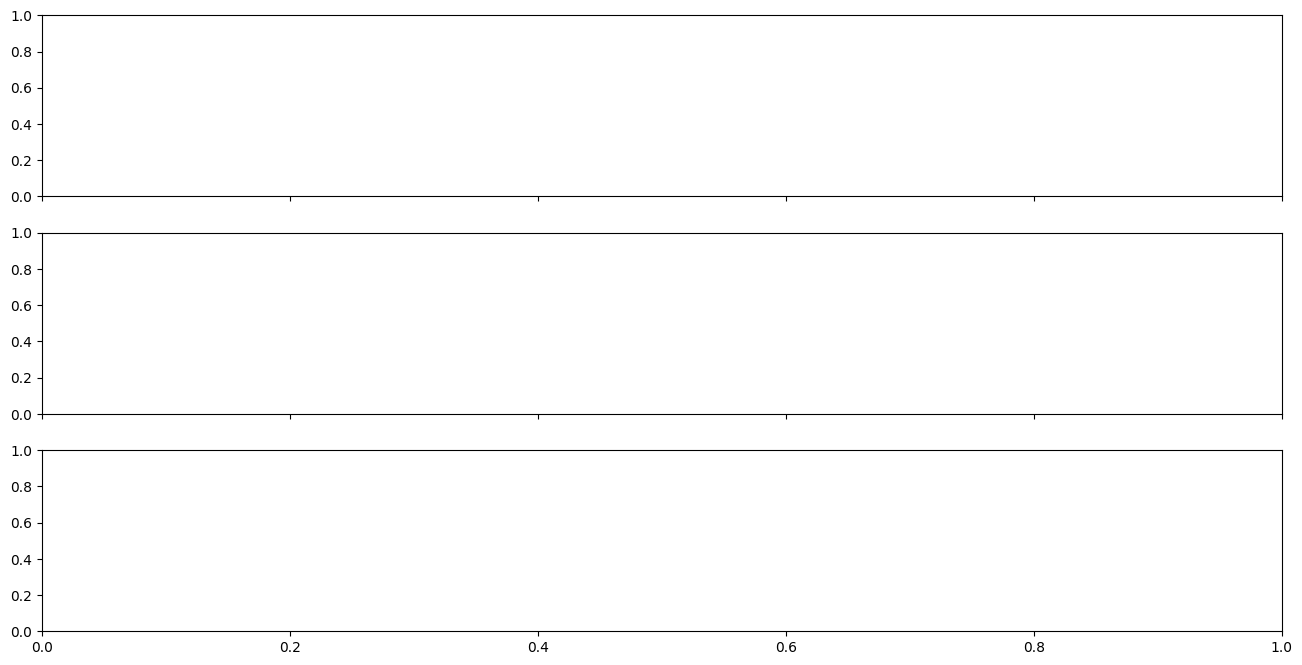

In [221]:
# train the model
hmm_model = GaussianHMM(
    n_components=3,                     # number of states
    covariance_type="full",             # full covariance matrix vs diagonal
    n_iter=1000                         # number of iterations
).fit(rets)

print("Model Score:", hmm_model.score(rets))

# Plot the in sample hidden states closing values
# Predict the hidden states array
hidden_states = hmm_model.predict(rets)
print("Number of hidden states:",len(hidden_states))
print('\nPercentage of hidden state 1 = %f' % (sum(hidden_states)/len(hidden_states)))

print("\nTransition matrix")
print(hmm_model.transmat_)

print("\nMeans and vars of each hidden state")
for i in range(hmm_model.n_components):   
    # 0 is down, 1 is up
    print("\n{0}th hidden state".format(i))
    print("mean = ", hmm_model.means_[i])
    print("var = ", np.diag(hmm_model.covars_[i]))
    print("\n")
    

fig, axs = plt.subplots(hmm_model.n_components, figsize=(16,8),sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, hmm_model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(spx_ret.index[mask], spx_price.loc[spx_ret.index][mask], ".", linestyle='dotted', c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    ax.grid(True)

plt.show()